# <font color="#D11149">EDA Case Study</font>


In [670]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <FONT COLOR="#D11149">A. Defining custom functions</FONT>

In [671]:
# Function to calcualte percentage of null values in a column
def null_percent(df, x):
    if(x=='columns'):
        percent_column=round(100*((df.isnull().sum())/(len(df.index))), 2)
        return percent_column
    elif(x=='rows'):
    # Function to calcualte percentage of null values in a row
        percent_rows=round(100*((df.isnull().sum(axis=1))/(len(df.columns))))
        return percent_rows
    else:
        print("Please enter either 'rows' or 'columns' after the second comma")

In [672]:
# Function to replace null values with median value
def replace_na(df, column):
    df.column=df.column.fillna(df.column.median())
    return df.column

In [673]:
# A function to see how loan status varies with another categorical variable
def loan_status_vs_category_var(category_column_name):
    len_uniques = len(loan[category_column_name].unique())
    #print(category_column_name,"has ",len_uniques," unique values.")
    #if(len_uniques>100):
     #   print(category_column_name,"has ",len_uniques," unique values. Too many uniques. Do you want to do this analysis")
      #  return
    ct1 = pd.crosstab(loan[category_column_name],loan["loan_status"])
    #Add columns for percentage
    #print("Printing cross table without percentages")
    #print(ct1)
    ct1['Total']=ct1["Charged Off"]+ct1["Current"]+ct1["Fully Paid"]
    ct1["CO-percent"]=np.true_divide(ct1["Charged Off"],ct1["Total"])*100
    ct1["Current-percent"]=np.true_divide(ct1["Current"],ct1["Total"])*100
    ct1["Fully Paid-percent"]=np.true_divide(ct1["Fully Paid"],ct1["Total"])*100
    del ct1["Charged Off"]
    del ct1["Current"]
    del ct1["Fully Paid"]
    del ct1["Total"]
    #print("Printing crosstable with percentages")
    #print(ct1)
    ct1.plot.bar(stacked=True, figsize=(15,7))
    
    plt.show()

## <FONT COLOR="#D11149">B. Other prelimiaries</FONT>

In [674]:
# Enabling full width display of Pandas DataFrames
pd.set_option('display.max_columns', None, 'display.max_rows', None, 'display.max_colwidth', -1)

In [675]:
#Creating a Pandas DataFrame object to read the 'loan.csv' file
loan=pd.read_csv(".//loan.csv", encoding='UTF-8', low_memory=False)

In [676]:
# Creating a Pandas DataFrame object to read 'Data_Dictionary' file
data_dict=pd.read_csv(".//Data_Dictionary.csv", encoding='UTF-8')

## <FONT COLOR="#D11149">1. Understanding the data</FONT>

In [677]:
# Displaying the loan DataFrame
loan.head(40)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   1077501  1296599    5000       5000         4975.00000        36 months   
1   1077430  1314167    2500       2500         2500.00000        60 months   
2   1077175  1313524    2400       2400         2400.00000        36 months   
3   1076863  1277178    10000      10000        10000.00000       36 months   
4   1075358  1311748    3000       3000         3000.00000        60 months   
5   1075269  1311441    5000       5000         5000.00000        36 months   
6   1069639  1304742    7000       7000         7000.00000        60 months   
7   1072053  1288686    3000       3000         3000.00000        36 months   
8   1071795  1306957    5600       5600         5600.00000        60 months   
9   1071570  1306721    5375       5375         5350.00000        60 months   
10  1070078  1305201    6500       6500         6500.00000        60 months   
11  1069908  1305008    12000      12000        12000.00000       36 months   
12  1064687  1298717    9000       9000         9000.00000        36 months   
13  1069866  1304956    3000       3000         3000.00000        36 months   
14  1069057  1303503    10000      10000        10000.00000       36 months   
15  1069759  1304871    1000       1000         1000.00000        36 months   
16  1065775  1299699    10000      10000        10000.00000       36 months   
17  1069971  1304884    3600       3600         3600.00000        36 months   
18  1062474  1294539    6000       6000         6000.00000        36 months   
19  1069742  1304855    9200       9200         9200.00000        36 months   
20  1069740  1284848    20250      20250        19142.16108       60 months   
21  1039153  1269083    21000      21000        21000.00000       36 months   
22  1069710  1304821    10000      10000        10000.00000       36 months   
23  1069700  1304810    10000      10000        10000.00000       36 months   
24  1069559  1304634    6000       6000         6000.00000        36 months   
25  1069697  1273773    15000      15000        15000.00000       36 months   
26  1069800  1304679    15000      15000        8725.00000        36 months   
27  1069657  1304764    5000       5000         5000.00000        60 months   
28  1069799  1304678    4000       4000         4000.00000        36 months   
29  1047704  1278806    8500       8500         8500.00000        36 months   
30  1032111  1261745    4375       4375         4375.00000        36 months   
31  1069539  1304608    31825      31825        31825.00000       36 months   
32  1065420  1299514    10000      10000        9975.00000        60 months   
33  1069591  1304289    5000       5000         5000.00000        36 months   
34  1069530  1291365    7000       7000         7000.00000        36 months   
35  1069522  1304589    12400      12400        12400.00000       36 months   
36  1069361  1304255    10800      10800        10800.00000       36 months   
37  1069357  1304251    15000      15000        15000.00000       36 months   
38  1069356  1304250    6000       6000         6000.00000        36 months   
39  1069346  1304237    12500      12500        12475.00000       60 months   

   int_rate  installment grade sub_grade  \
0   10.65%   162.87       B     B2         
1   15.27%   59.83        C     C4         
2   15.96%   84.33        C     C5         
3   13.49%   339.31       C     C1         
4   12.69%   67.79        B     B5         
5   7.90%    156.46       A     A4         
6   15.96%   170.08       C     C5         
7   18.64%   109.43       E     E1         
8   21.28%   152.39       F     F2         
9   12.69%   121.45       B     B5         
10  14.65%   153.45       C     C3         
11  12.69%   402.54       B     B5         
12  13.49%   305.38       C     C1         
13  9.91%    96.68        B     B1         
14  10.65%   325.74       B     B2         
15  16.29%   35.31        D     D1         
16  15.27%   347.98  

In [678]:
# Describing the loan DataFrame
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05  7456.670694   7187.238670    
min    5.473400e+04  7.069900e+04  500.000000    500.000000     
25%    5.162210e+05  6.667800e+05  5500.000000   5400.000000    
50%    6.656650e+05  8.508120e+05  10000.000000  9600.000000    
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count  39717.000000     39717.000000  3.971700e+04  39717.000000   
mean   10397.448868     324.561922    6.896893e+04  13.315130      
std    7128.450439      208.874874    6.379377e+04  6.678594       
min    0.000000         15.690000     4.000000e+03  0.000000       
25%    5000.000000      167.020000    4.040400e+04  8.170000       
50%    8975.000000      280.220000    5.900000e+04  13.400000      
75%    14400.000000     430.780000    8.230000e+04  18.600000      
max    35000.000000     1305.190000   6.000000e+06  29.990000      

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000  39717.000000    14035.000000             
mean   0.146512      0.869200        35.900962                
std    0.491812      1.070219        22.020060                
min    0.000000      0.000000        0.000000                 
25%    0.000000      0.000000        18.000000                
50%    0.000000      1.000000        34.000000                
75%    0.000000      1.000000        52.000000                
max    11.000000     8.000000        120.000000               

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count  2786.000000             39717.000000  39717.000000  39717.000000    
mean   69.698134               9.294408      0.055065      13382.528086    
std    43.822529               4.400282      0.237200      15885.016641    
min    0.000000                2.000000      0.000000      0.000000        
25%    22.000000               6.000000      0.000000      3703.000000     
50%    90.000000               9.000000      0.000000      8850.000000     
75%    104.000000              12.000000     0.000000      17058.000000    
max    129.000000              44.000000     4.000000      149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000  39717.000000   39717.000000   
mean   22.088828     51.227887     50.989768      12153.596544   
std    11.401709     375.172839    373.824457     9042.040766    
min    2.000000      0.000000      0.000000       0.000000       
25%    13.000000     0.000000      0.000000       5576.930000    
50%    20.000000     0.000000      0.000000       9899.640319    
75%    29.000000     0.000000      0.000000       16534.433040   
max    90.000000     6311.470000   6307.370000    58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count  39717.000000     39717.000000     39717.000000   39717.000000         
mean   11567.149118     9793.348813      2263.663172    1.363015             
std    8942.672613      7065.522127      2608.111964    7.289979             
min    0.000000         0.000000         0.000000       0.000000             
25%    5112.310000      4600.000000      662.180000     0.000000             
50%    9287.150000      8000.000000      1348.910000    0.000000             
75%    15798.810000     13653.260000     2833.400000    0.000000             
max    58563.680000     35000.020000     23563.680000   180.200000           

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000  39717.000000             39717.000000      
mean   95.221624     12.406112                2678.826162       
std    688.744771    148.671593               4447.136012       
min    

In [679]:
loan.shape

(39717, 111)

## <FONT COLOR="#D11149">2. Data cleaning</FONT>

<font color=#7f0070>Columns with only one unique value are identified and dropped since they won't be driving factors for either default or non-default.</font>

In [680]:
for col in list(loan.columns):
    if(loan[col].nunique()==1):
        print(col)
        loan.drop(col, axis=1, inplace=True)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


<font color=#7f0070>Based on analysis of the DataFrame, it can be seen that several columns have NaN values. Therefore, the next step is to identify percentage of null values in each of the column.</font>

In [681]:
# Calculating percentage of null values in each column of the loan DataFrame
null_percent_columns=null_percent(loan, 'columns')
null_percent_columns.sort_values(ascending=False)

total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
dti_joint       

<font color=#7f0070>As can be seen from the above cell, a lot of columns have 100% null values and some have very high percentage of null values. Those columns with 100% null values can be dropped entirely as they will serve no use in further analysis. Other columns with high percentage of null values include 'next_paymnt_d', 'mths_since_last_record', 'mths_since_last_delinq' and 'desc'. 

Of these, 'next_paymnt_d', 'mths_since_last_record' have a very high null value percentage and can therefore be dropped. 'mths_since_last_delinq' refers to post delinquency and would therefore not have an impact on predicting probability of delinquency by a customer. Moreover, this column also has a high null value percentage and can therefore be dropped.

'desc' can be retained by imputing null values with a blank or an appropriate subsitute such as 'No description available'.</font>

In [682]:
# Dropping all columns with greater than 50% null values

loan=loan.drop(list(null_percent_columns[null_percent_columns>50].index), axis=1)
loan.head(2)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599    5000       5000         4975.0            36 months   
1  1077430  1314167    2500       2500         2500.0            60 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0  10.65%   162.87       B     B2        NaN       10+ years  RENT            
1  15.27%   59.83        C     C4        Ryder     < 1 year   RENT            

   annual_inc verification_status issue_d  loan_status  \
0  24000.0     Verified            Dec-11  Fully Paid    
1  30000.0     Source Verified     Dec-11  Charged Off   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   

       purpose     title zip_code addr_state    dti  delinq_2yrs  \
0  credit_card  Computer  860xx    AZ         27.65  0             
1  car          bike      309xx    GA         1.00   0             

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0  Jan-85           1               3         0        13648      83.70%      
1  Apr-99           5               3         0        1687       9.40%       

   total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0  9          0.0        0.0            5863.155187  5833.84           
1  4          0.0        0.0            1008.710000  1008.71           

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0  5000.00          863.16         0.0                 0.00         
1  456.46           435.17         0.0                 117.08       

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0  0.00                     Jan-15       171.62           May-16              
1  1.11                     Apr-13       119.66           Sep-13              

   pub_rec_bankruptcies  
0  0.0                   
1  0.0

<font color=#7f0070>Calculating the percentage of null values across rows to see if some rows have a very high percentage of null values and could thus be dropped.</font>

In [683]:
null_percent_rows=null_percent(loan, 'rows')
null_percent_rows.sort_values(ascending=False)

4714     7.0
14839    7.0
18184    7.0
28716    7.0
11282    7.0
39715    7.0
26025    7.0
32593    7.0
39476    7.0
13891    7.0
39714    7.0
5716     4.0
21453    4.0
29875    4.0
5739     4.0
21404    4.0
21452    4.0
5675     4.0
29872    4.0
29909    4.0
21462    4.0
21463    4.0
5668     4.0
5648     4.0
5597     4.0
21517    4.0
29813    4.0
21521    4.0
5750     4.0
5815     4.0
21365    4.0
30033    4.0
6179     4.0
6174     4.0
6162     4.0
6135     4.0
20910    4.0
20917    4.0
6025     4.0
6022     4.0
6002     4.0
21056    4.0
21065    4.0
5798     4.0
21077    4.0
21125    4.0
21167    4.0
5908     4.0
21212    4.0
5877     4.0
21229    4.0
21285    4.0
5822     4.0
21525    4.0
21523    4.0
29784    4.0
29791    4.0
22116    4.0
5050     4.0
21970    4.0
21996    4.0
22030    4.0
5009     4.0
4986     4.0
29567    4.0
22076    4.0
4945     4.0
4943     4.0
4876     4.0
21544    4.0
4871     4.0
22171    4.0
22185    4.0
4857     4.0
4852     4.0
4851     4.0
4836     4.0

<font color=#7f0070>As can be seen from above, the highest null value percentage across rows is 11%. Since this is not a high percentage and some of the useful columns might contain non-null data in such rows, all rows can be retained.</font>

<font color=#7f0070>Doing the same for *data_dict* DataFrame</font>

In [684]:
data_dict=data_dict.loc[:, 'LoanStatNew':'Description']

### <font color=d11149>2.1 Fixing data types</font>

<font color=#7f0070>Many columns' data type is listed as 'object'. These data types need to be made concrete before proceeding for further anaylsis</font>

In [685]:
# Selecting all columns in loan DataFrame with 'object' data type
loan.select_dtypes(include=['object']).head(3)

term int_rate grade sub_grade emp_title emp_length home_ownership  \
0   36 months  10.65%   B     B2        NaN       10+ years  RENT            
1   60 months  15.27%   C     C4        Ryder     < 1 year   RENT            
2   36 months  15.96%   C     C5        NaN       10+ years  RENT            

  verification_status issue_d  loan_status  \
0  Verified            Dec-11  Fully Paid    
1  Source Verified     Dec-11  Charged Off   
2  Not Verified        Dec-11  Fully Paid    

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2  NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

          purpose                 title zip_code addr_state earliest_cr_line  \
0  credit_card     Computer              860xx    AZ         Jan-85            
1  car             bike                  309xx    GA         Apr-99            
2  small_business  real estate business  606xx    IL         Nov-01            

  revol_util last_pymnt_d last_credit_pull_d  
0  83.70%     Jan-15       May-16             
1  9.40%      Apr-13       Sep-13             
2  98.50%     Jun-14       May-16

<font color=#7f0070>As can be seen from the above data frame, several columns need to be type casted to the correct type and in addition redundant strings in such columns need to be removed.</font>

#### <font color=d11149>2.1.1 Fixing column 'term'</font>

In [686]:
# Retaining just the numerical part of the string
loan.term=loan.term.str.split(' ').str.get(1)
loan.term

0        36
1        60
2        36
3        36
4        60
5        36
6        60
7        36
8        60
9        60
10       60
11       36
12       36
13       36
14       36
15       36
16       36
17       36
18       36
19       36
20       60
21       36
22       36
23       36
24       36
25       36
26       36
27       60
28       36
29       36
30       36
31       36
32       60
33       36
34       36
35       36
36       36
37       36
38       36
39       60
40       36
41       36
42       36
43       36
44       36
45       36
46       36
47       36
48       36
49       36
50       36
51       36
52       36
53       36
54       36
55       60
56       60
57       36
58       36
59       36
60       60
61       60
62       60
63       36
64       60
65       36
66       60
67       36
68       60
69       36
70       60
71       36
72       36
73       36
74       36
75       36
76       36
77       60
78       36
79       60
80       60
81       36
82       36
83  

In [687]:
# Typecasting the column to int
loan.term.astype(int)

0        36
1        60
2        36
3        36
4        60
5        36
6        60
7        36
8        60
9        60
10       60
11       36
12       36
13       36
14       36
15       36
16       36
17       36
18       36
19       36
20       60
21       36
22       36
23       36
24       36
25       36
26       36
27       60
28       36
29       36
30       36
31       36
32       60
33       36
34       36
35       36
36       36
37       36
38       36
39       60
40       36
41       36
42       36
43       36
44       36
45       36
46       36
47       36
48       36
49       36
50       36
51       36
52       36
53       36
54       36
55       60
56       60
57       36
58       36
59       36
60       60
61       60
62       60
63       36
64       60
65       36
66       60
67       36
68       60
69       36
70       60
71       36
72       36
73       36
74       36
75       36
76       36
77       60
78       36
79       60
80       60
81       36
82       36
83  

#### <font color=d11149>2.1.2 Fixing column 'int_rate'</font>

In [688]:
# Stripping away the % sign
loan.int_rate=loan.int_rate.str.strip('%')

In [689]:
# Typecasting the int_rate column to float
loan.int_rate=loan.int_rate.astype(float)

#### <font color=d11149>2.1.3 Fixing columns 'issue_d', 'earliest_cr_line', 'last_credit_pull_d' and 'last_pymnt_d'</font>


In [690]:
loan['issue_d']=pd.to_datetime(loan['issue_d'], format="%b-%y")
loan['earliest_cr_line']=pd.to_datetime(loan['earliest_cr_line'], format="%b-%y")
loan['last_credit_pull_d']=pd.to_datetime(loan['last_credit_pull_d'], format="%b-%y")
loan['last_pymnt_d']=pd.to_datetime(loan['last_pymnt_d'], format="%b-%y")

#### <font color=d11149>2.1.4 Changing column 'revol_util' to float type</font>


In [691]:
loan.revol_util=loan.revol_util.str.strip('%')
loan.revol_util=loan.revol_util.astype(float)

### <font color=d11149>2.2 Fixing missing values</font>

<font color=#7f0070>First, we list down all the columns in the cleaned up DataFrame with some missing/null values</font>

In [692]:
null_percent_columns_2=null_percent(loan, 'columns')
loan_null_columns=null_percent_columns_2[null_percent_columns_2>0].to_frame().reset_index()
loan_null_columns.rename(columns={'index':'column_names', 0:'percent_null_values'}, inplace=True)
loan_null_columns.columns
null_columns_df=pd.merge(loan_null_columns, data_dict, how="inner", left_on='column_names', right_on='LoanStatNew')
null_columns_df

column_names  percent_null_values           LoanStatNew  \
0  emp_title             6.19                 emp_title              
1  desc                  32.58                desc                   
2  title                 0.03                 title                  
3  revol_util            0.13                 revol_util             
4  last_pymnt_d          0.18                 last_pymnt_d           
5  last_credit_pull_d    0.01                 last_credit_pull_d     
6  pub_rec_bankruptcies  1.75                 pub_rec_bankruptcies   

                                                                                                                  Description  
0  The job title supplied by the Borrower when applying for the loan.                                                          
1  Loan description provided by the borrower                                                                                   
2  The loan title provided by the borrower                                                                                     
3  Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.  
4  Last month payment was received                                                                                             
5  The most recent month LC pulled credit for this loan                                                                        
6  Number of public record bankruptcies

<font color=#7f0070>Of the columns listed above, the ones that can have an impact on defaults or delinquency are 'revol_util', 'last_pymnt_d' and 'pub_rec_bankruptcies'. Therefore, the missing values in these columns can be replace by the median values of these columns in case of float or integer types and can be ignored in other cases.</font>

In [693]:
# Replacing null values with median for the above mentioned columns

#loan.pub_rec_bankruptcies=loan.pub_rec_bankruptcies.fillna(loan.pub_rec_bankruptcies.median())

## <FONT COLOR="#D11149">3. Univariate analysis</FONT>

<font color=#7f0070>Plotting barplots of all integer and float type columns</font>

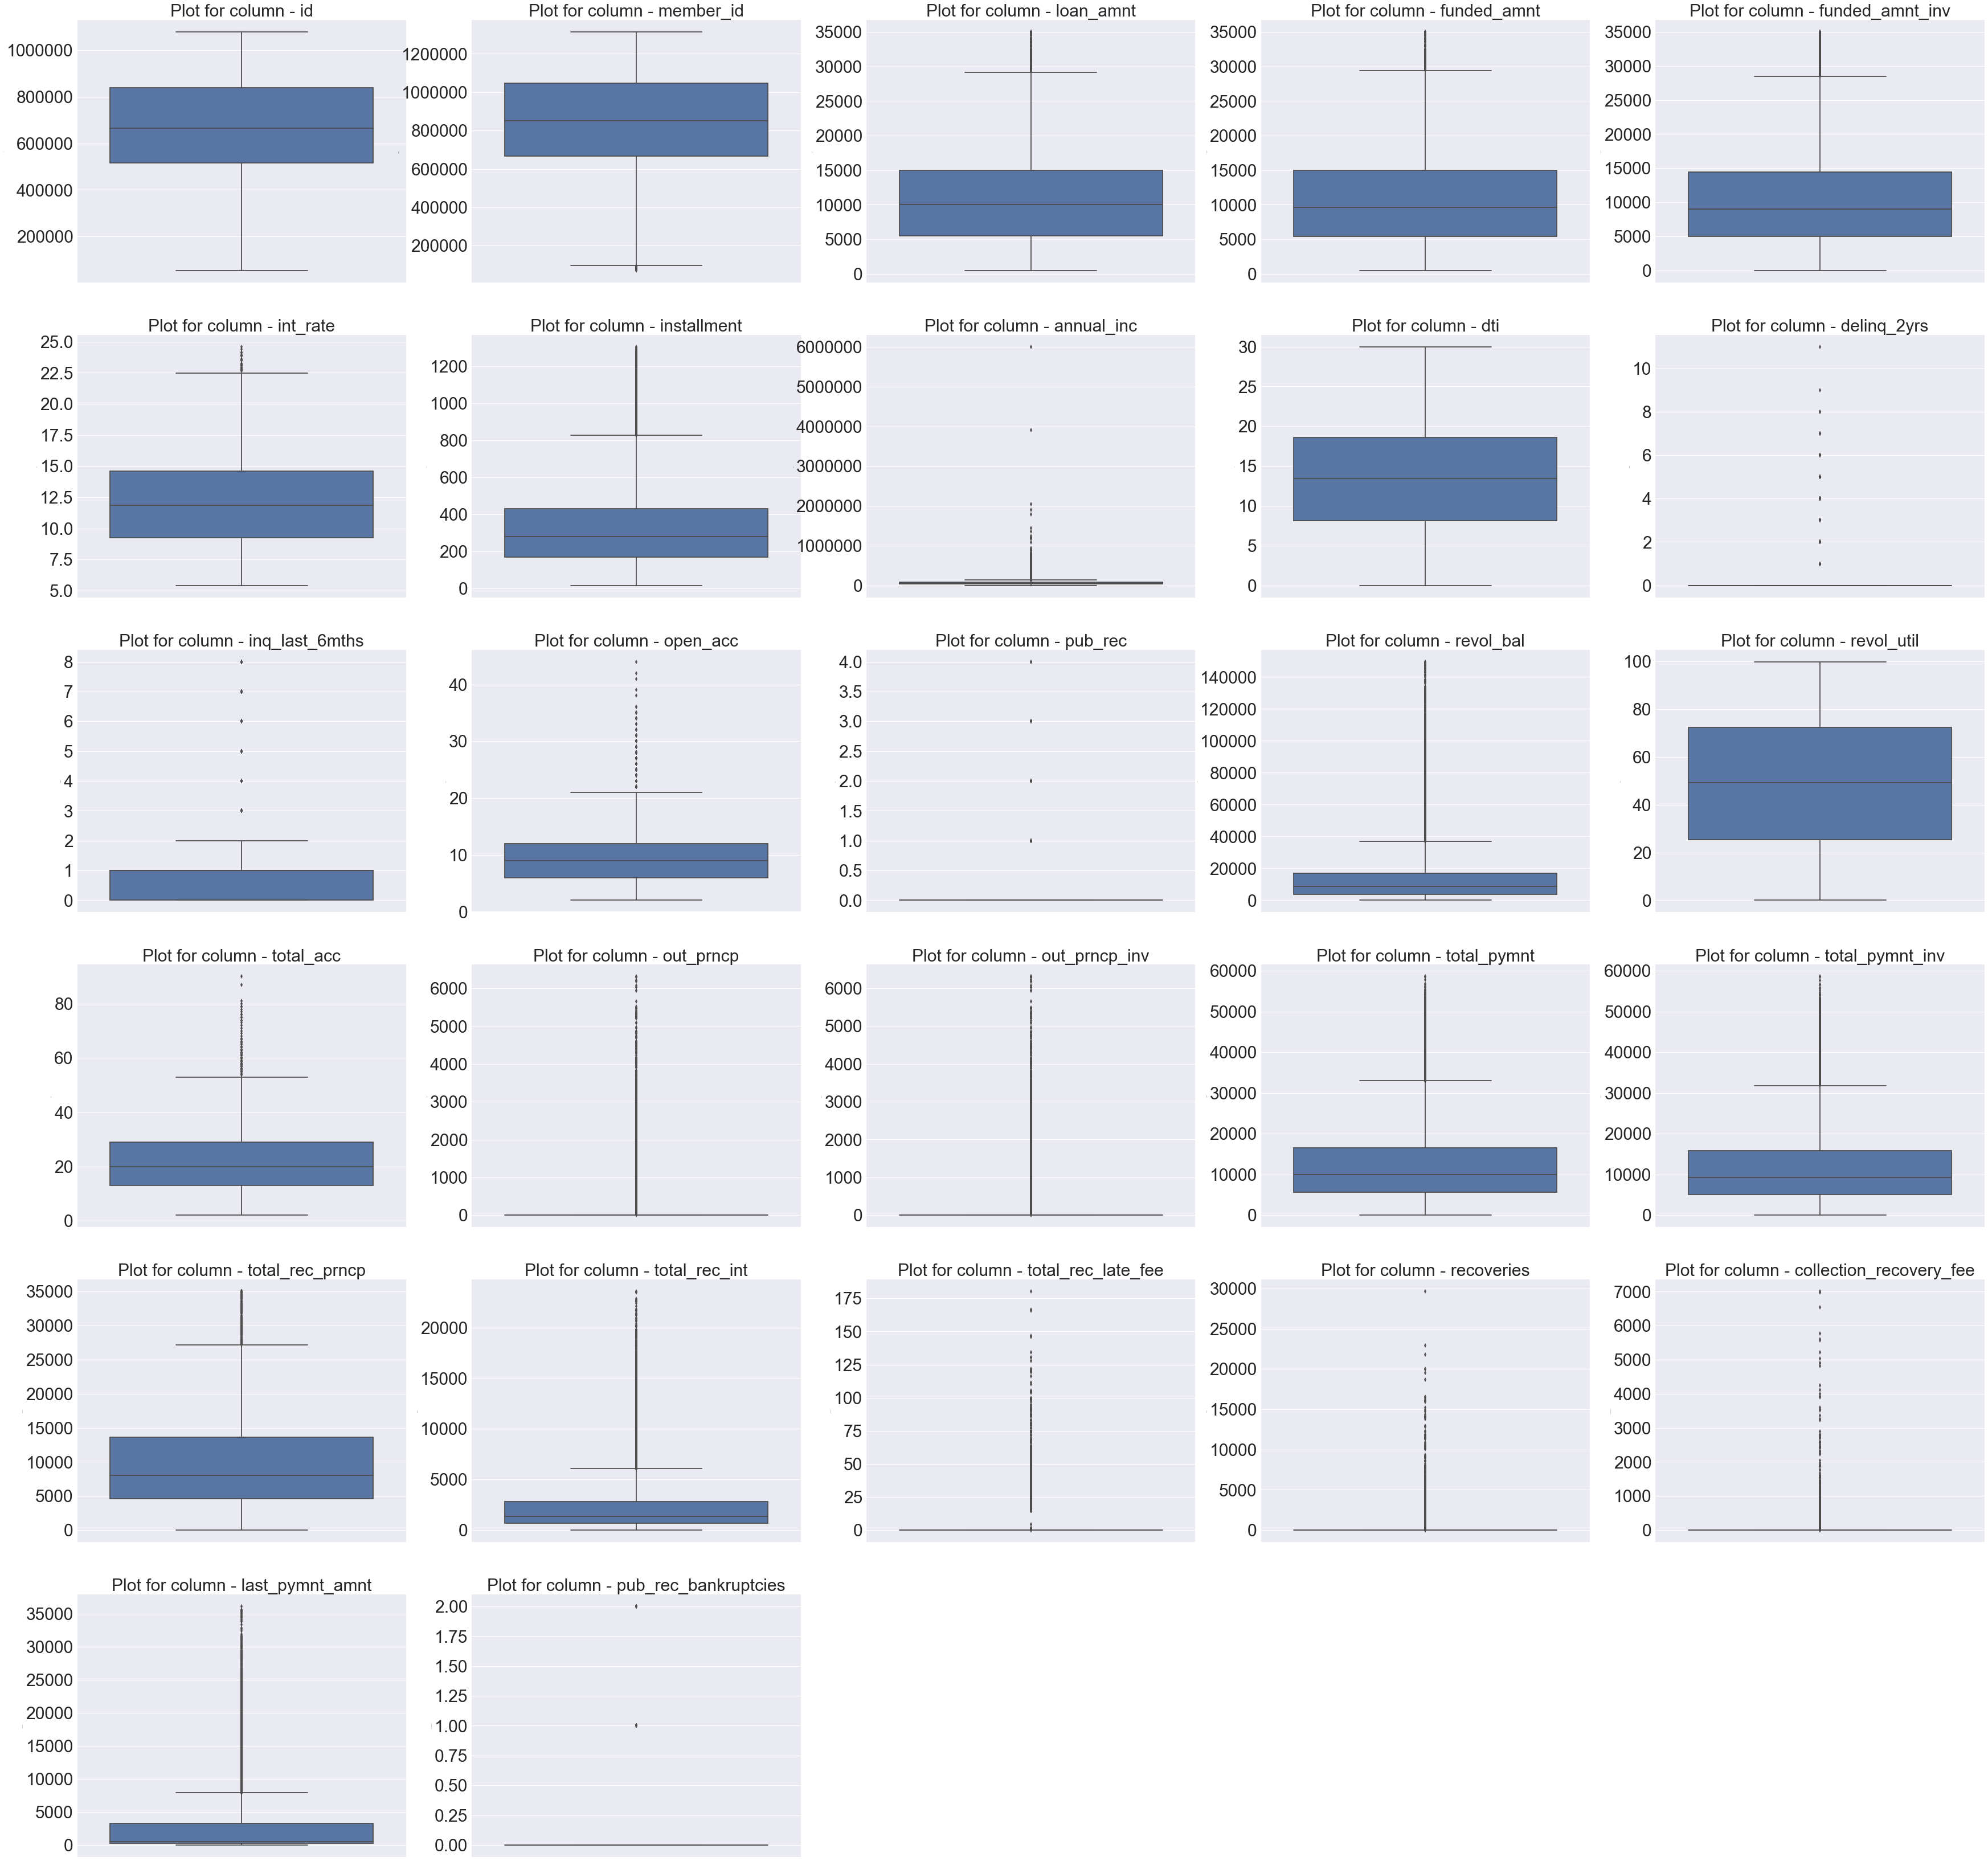

In [694]:
int_len=len(list(loan.select_dtypes(include=['int64', 'float64']).columns))
plt.figure(1, figsize=(60,100))
for i in range(1, int_len+1):
    plt.subplot(10,5,i)
    plt.xticks(rotation=90, fontsize=30)
    #plt.xlabel('variable', fontsize=30)
    plt.ylabel('', fontsize=0)
    plt.yticks(fontsize=30)
    m=list(loan.select_dtypes(include=['int64', 'float64']).columns)[i-1]
    plt.title("Plot for column - "+m, fontsize=30)
    sns.boxplot(y=loan[m])
    
    
plt.show()    


## <FONT COLOR="#D11149">4. Bivariate analysis</FONT>

### <FONT COLOR="#D11149">4.1 Bivariate analysis for numeric columns</FONT>

<font color=#7f0070>Creating a heatmap for all the numeric variables to see the correlation between different variables</font>

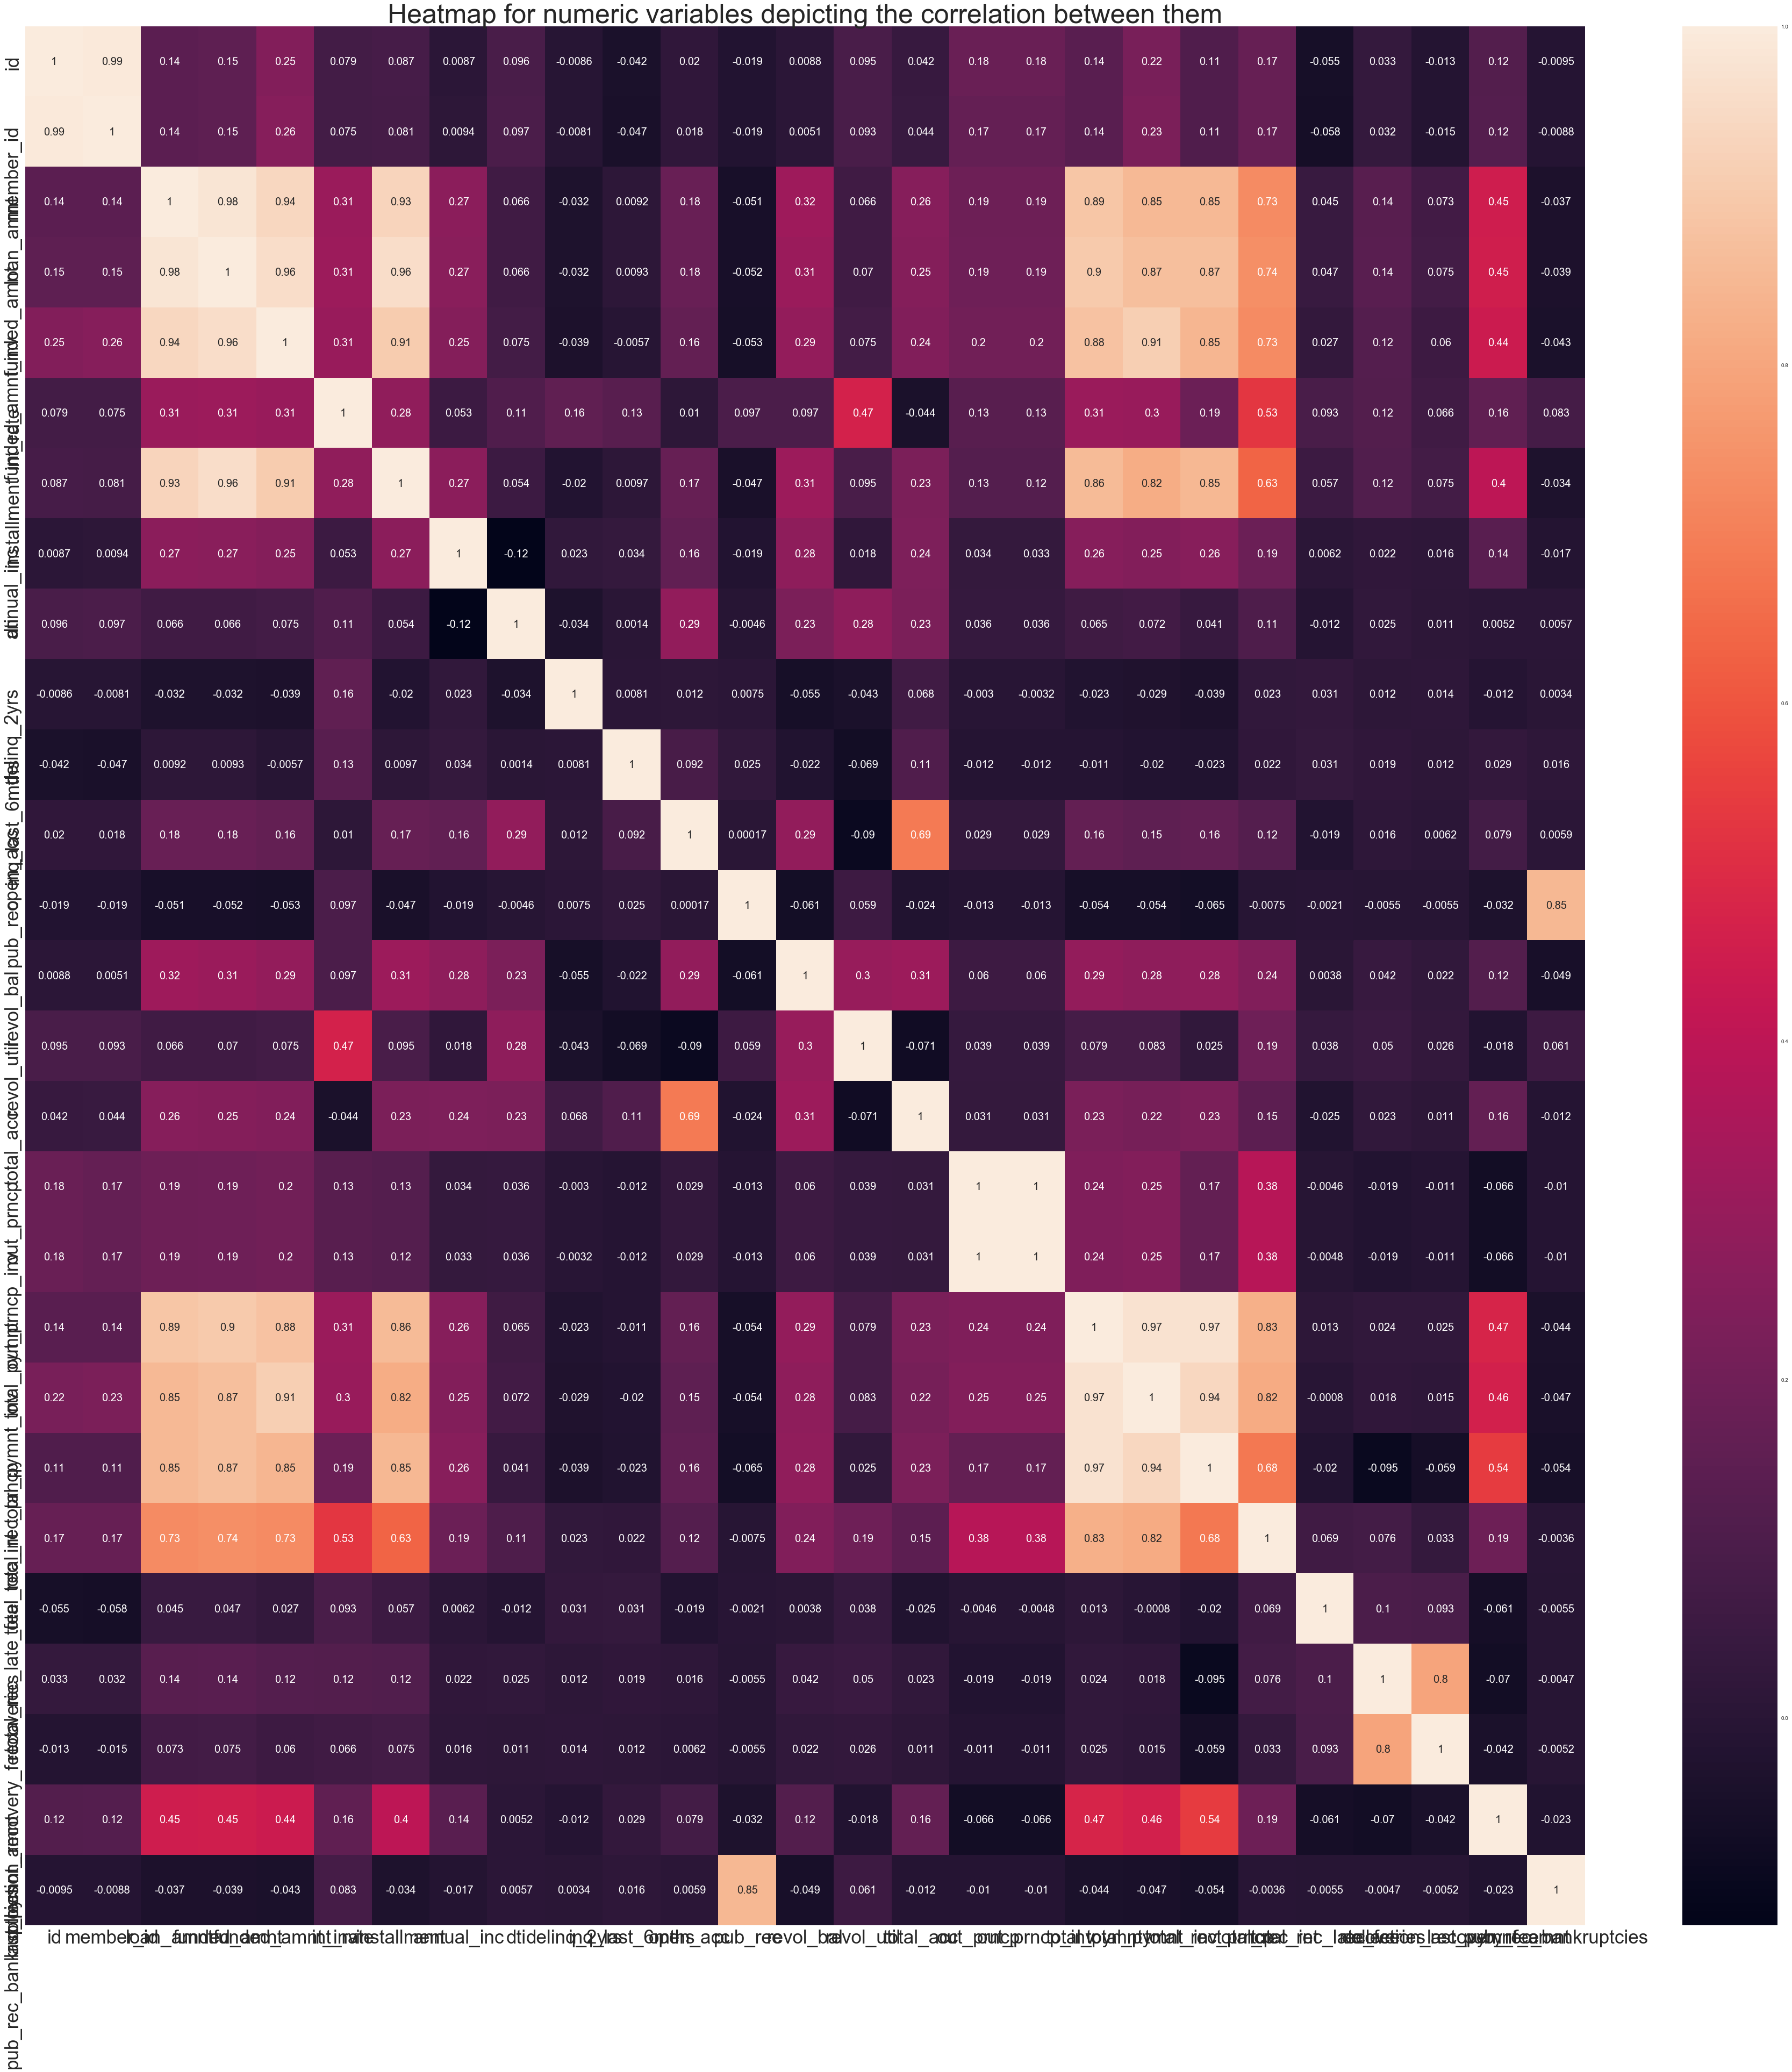

In [695]:
x=loan.select_dtypes(include=['int64', 'float64'])
y=x.corr()
plt.figure(2, figsize=(65,65))
sns.heatmap(y, annot=True, annot_kws={"size": 20})
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
sns.set(font_scale=5)
plt.title("Heatmap for numeric variables depicting the correlation between them", fontsize=50)
plt.show()

<font color=#7f0070>As can be seen from the heatmap above, some of the columns are completely unrelated to either 'loan_status' or to other columns. <br>
Further, some of the columns are not relevant for predicting delinquency events such as 'recoveries' and 'collection_recovery_fee' since these obviously occur post default.<br>
These columns can therefore be dropped from the analysis. The heatmap after dropping these columns is presented below
</font>

In [696]:
loan=loan.drop(['recoveries', 'collection_recovery_fee'], axis=1)

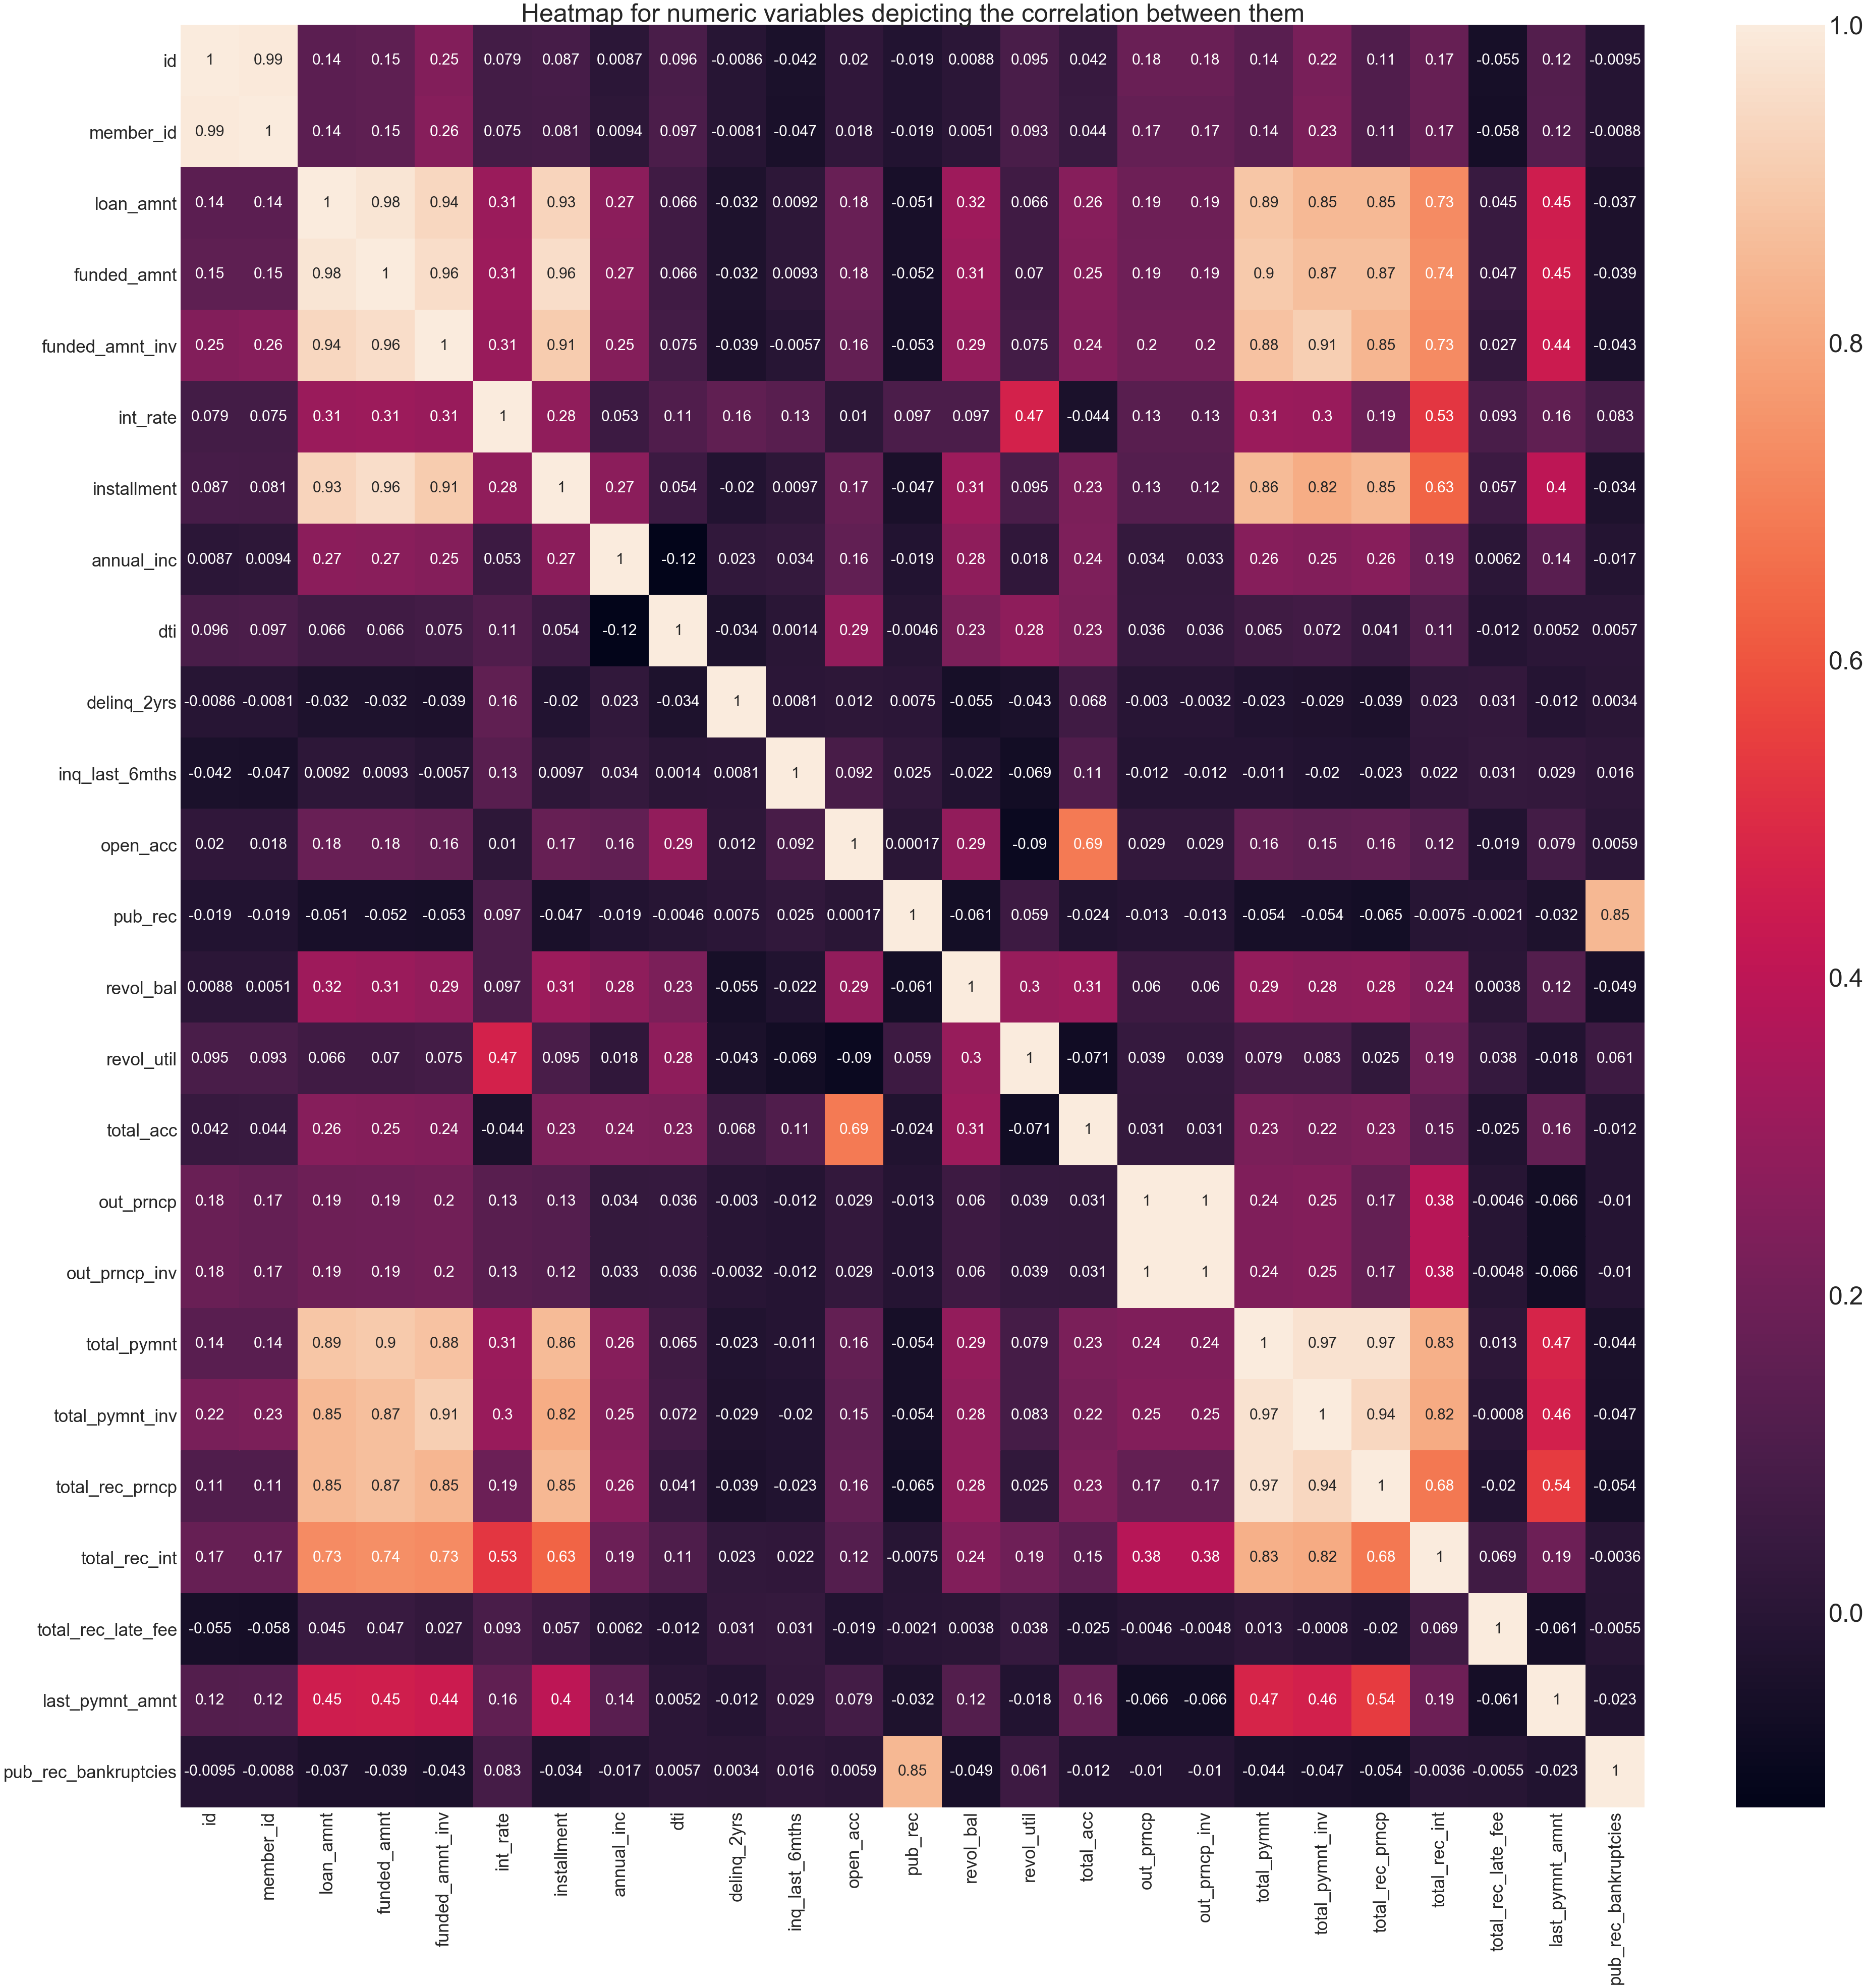

In [697]:
x=loan.select_dtypes(include=['int64', 'float64'])
y=x.corr()
plt.figure(3, figsize=(65,65))
sns.heatmap(y, annot=True, annot_kws={"size": 30})
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
sns.set(font_scale=5)
plt.title("Heatmap for numeric variables depicting the correlation between them", fontsize=50)
plt.show()

<font color=#7f0070>Only few columns are strongly correlated represented by light patterned sub matrices within the heatmap. On close inspection, it can be seen that the correlation between such columns is natural, such as that between 'total_pymnt' and 'funded_amnt'. ***However, further derived metrics from such column can provide more insight***</font>

### <FONT COLOR="#D11149">4.2 Bivariate analysis for numerical columns</FONT>

<font color=#7f0070>In this section, the relationship of numerical columns shall be depicted with 'loan_status'</font>

In [698]:
sns.set(font_scale=1)

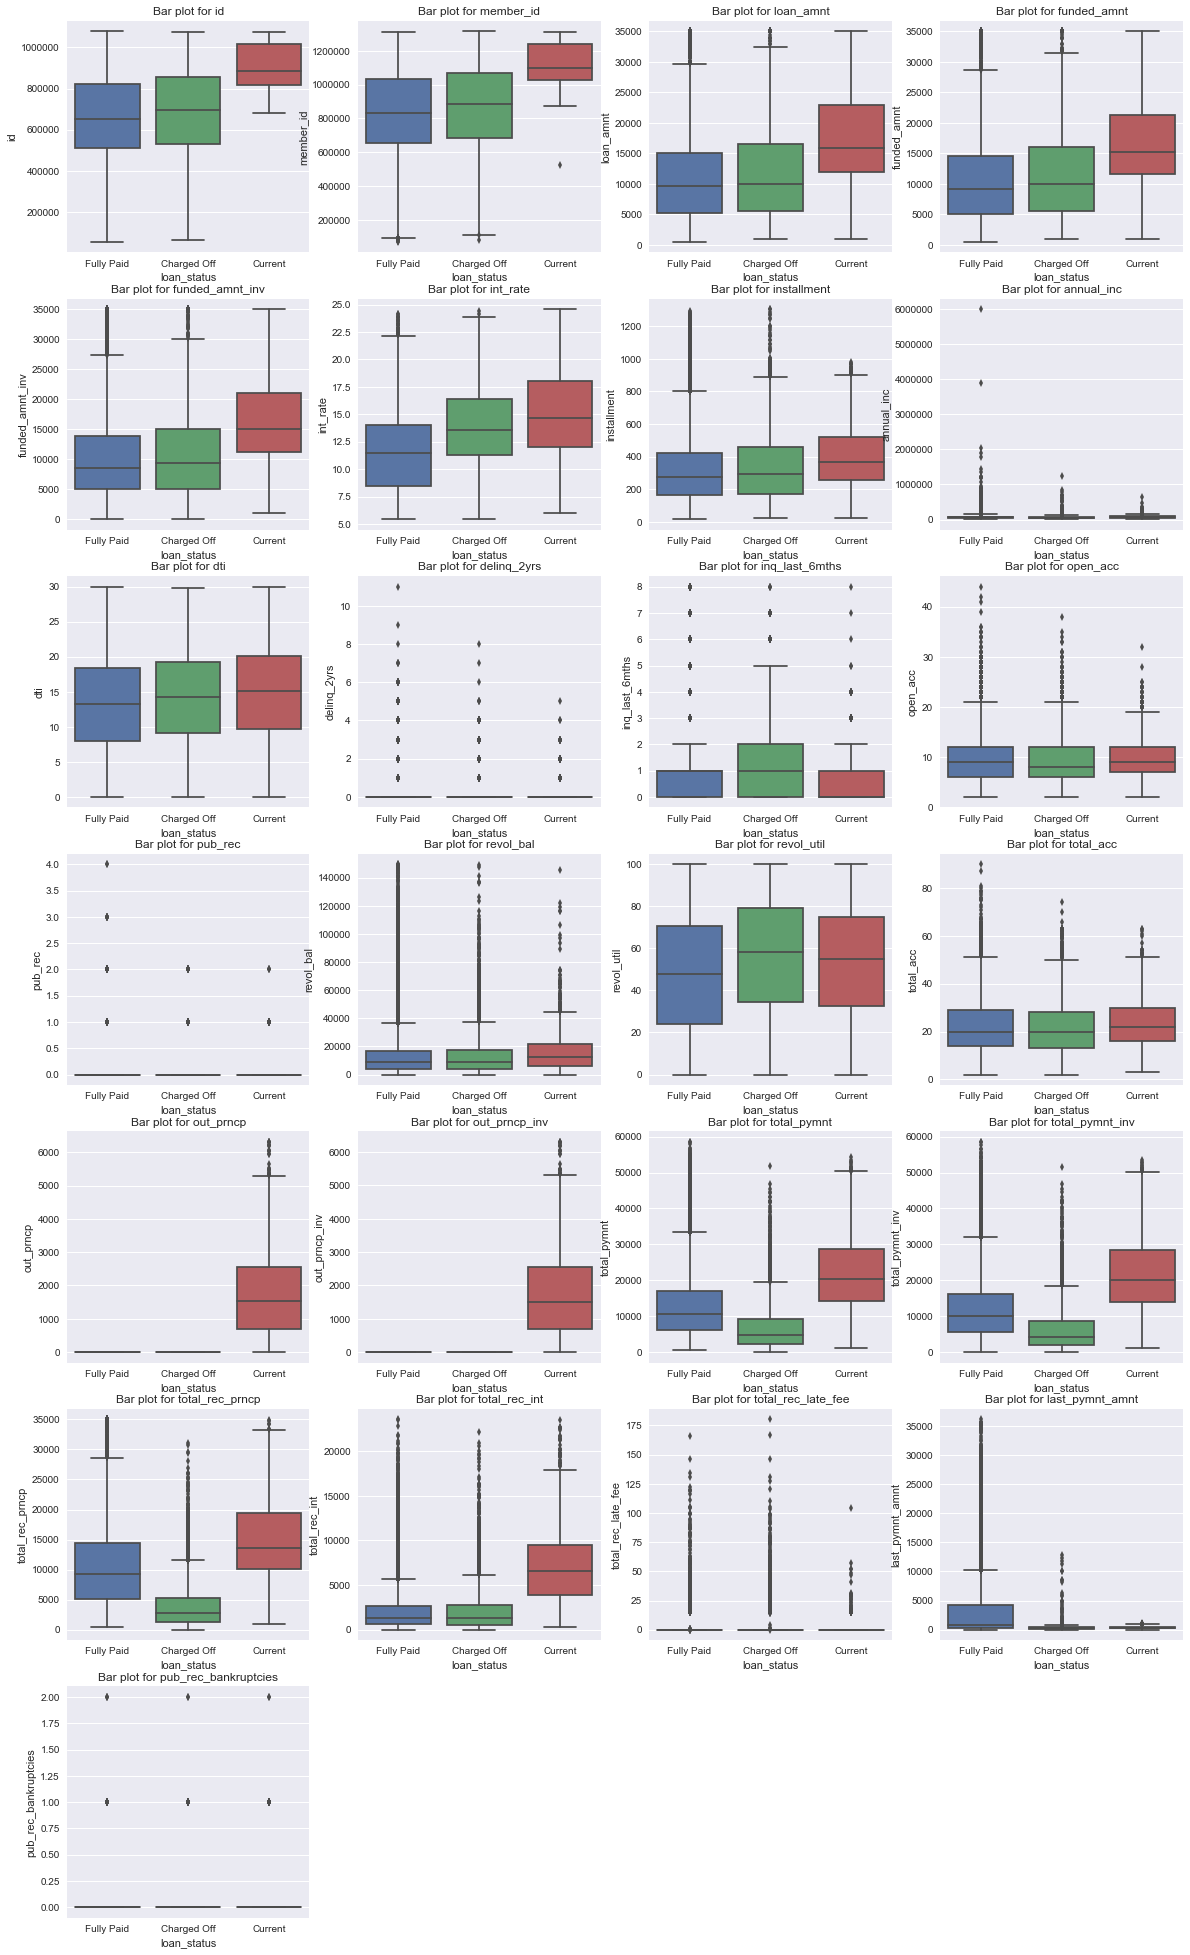

In [699]:
int_col_list=list(loan.select_dtypes(include=['int64', 'float64']).columns)
int_len=len(int_col_list)
loan_status_CO=loan.loc[loan.loan_status=="Charged Off"]
loan_status_FP=loan.loc[loan.loan_status=="Fully Paid"]
fig=plt.figure(5, figsize=(20,40))
for i in range(1, int_len+1):
    plt.subplot(8,4,i)
    sns.boxplot(x='loan_status', y=loan[int_col_list[i-1]], data=loan)
    plt.title("Bar plot for "+int_col_list[i-1])

    
plt.show()

#### <FONT COLOR="#D11149">4.2.1 Key conclusions - Bivariate analysis for numerical columns</FONT>


<font color=#7f0070>In the distribution plots above, the blue colour represents the distribution for "Charged Off" cases whereas the green one represents "Fully Paid" cases. A few observations can be noted as below: <br>
1. The rate of defaut is slightly higher as **loan amount** and its associated variables such as **funded amount** and **funded amount inv** increases.
2. The number of default cases are higher when the **interest rates** are higher than ~15%.
3. Much lesser **total payment** and its associated variables such as **total principal recieved** and **total investors payment** has been recieved by defaulters.

### <FONT COLOR="#D11149">4.3 Bivariate analysis for categorical columns</FONT>


<font color=#7f0070>In this section, the relationship of categorical columns shall be depicted with 'loan_status'</font>

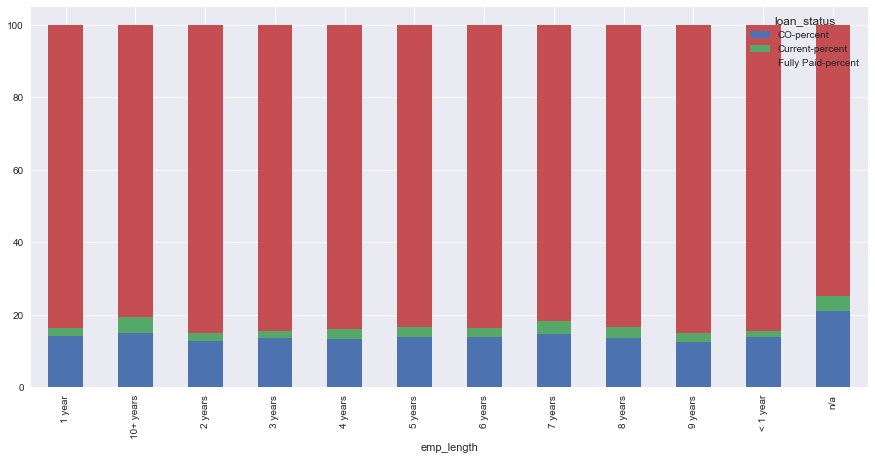

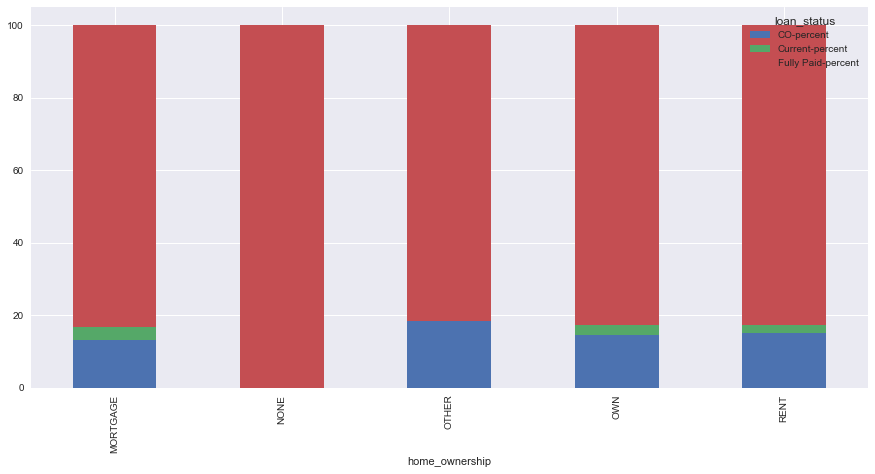

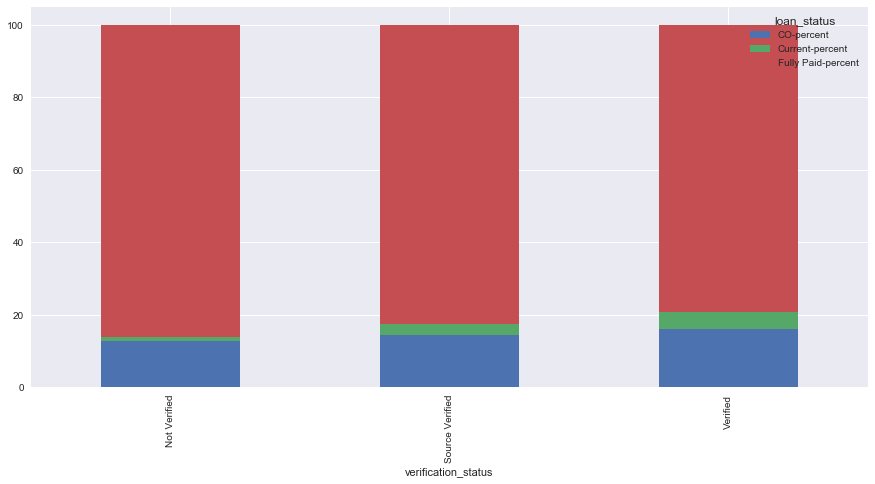

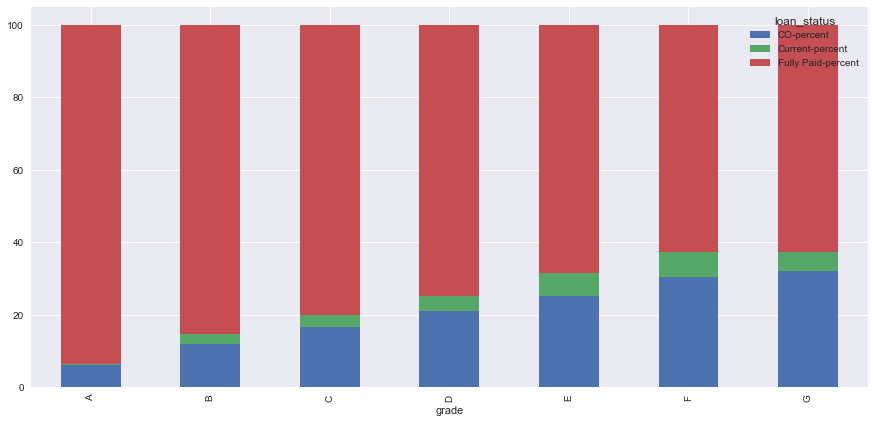

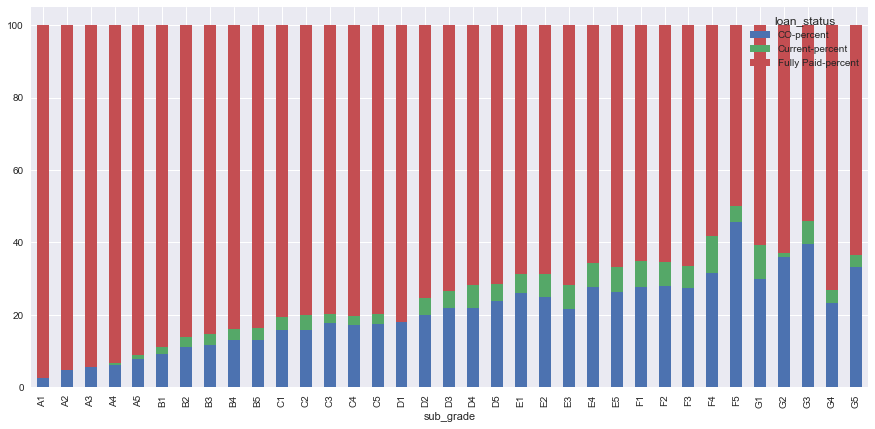

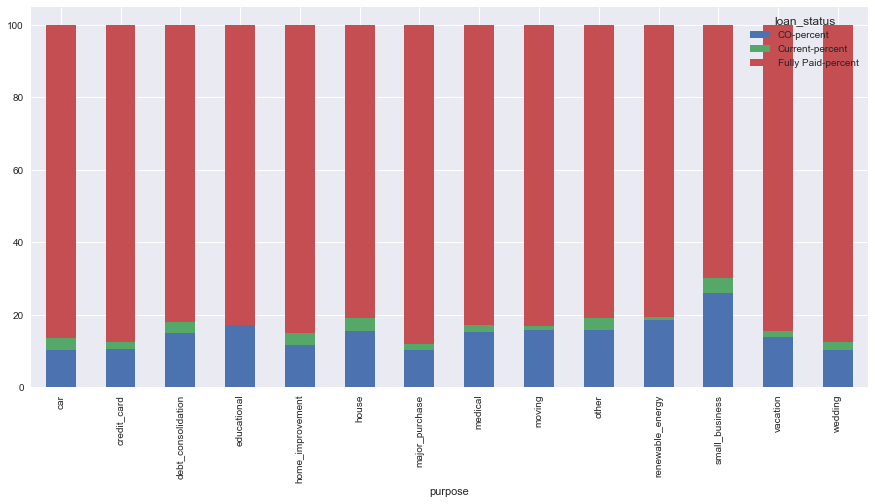

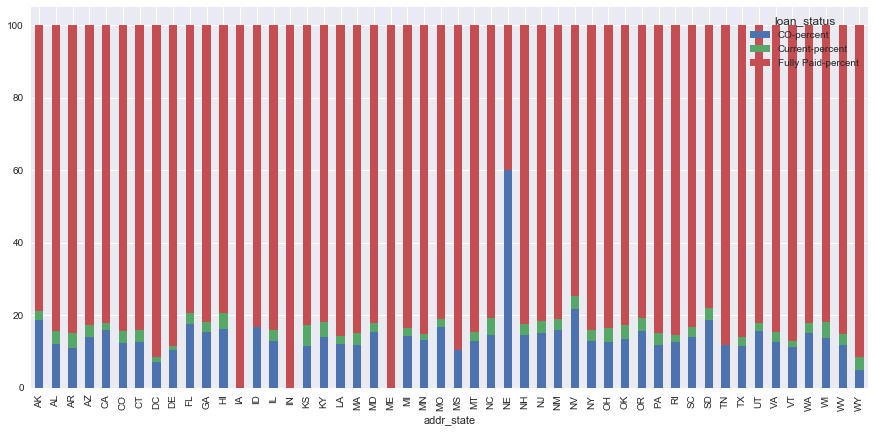

In [700]:
loan_cat_list=['emp_length', 'home_ownership', 'verification_status', 'grade', 'sub_grade', 'purpose', 'addr_state']
for i in range(1, len(loan_cat_list)+1):
    loan_status_vs_category_var(loan_cat_list[i-1])




#### <FONT COLOR="#D11149">4.3.1 Key conclusions - Bivariate analysis for categorical columns</FONT>


<font color=#7f0070>In the distribution plots above, the blue colour represents the distribution for "Charged Off" cases, green represents "Current" and red represents "Fully Paid" cases. A few observations can be noted as below: <br>
1. Slightly higher risk of default if **source is verified**.
2. Risk of default increases as **grade** and **sub-grade** increases which is in coherence with higher default risk with increasing interest rates found earlier in bivariate analysis for numerical variables.
3. **Small business, renewable energy, house and debt consolidation** are the purposes which have the highest risk of default, in that order.
4. The state of **Nebraska** has an abnormally high rate of default.

In [701]:
#################################################################
#
#Bivariate analysis
################################################################

# We created some derived metrics to study the percentage of charged off loans and placing them in a new dataframe
# which we call final_ct which is a cross tab dataframe

ct1 = pd.crosstab(loan['issue_d'],[loan['term'],loan['loan_status']])



ct1["date"] = pd.to_datetime(ct1.index)


ct2 = pd.crosstab(loan['issue_d'], loan['funded_amnt_inv'].count(),colnames=['total_loans'])

ct3 = pd.crosstab(loan['issue_d'], [loan['term'],loan['funded_amnt_inv'].count()])

ct3["date"] = pd.to_datetime(ct3.index)
ct2["date"] = pd.to_datetime(ct2.index)


final_ct= pd.merge(ct1, ct2,how='outer',on='date')

final_ct = pd.merge(final_ct,ct3,how='outer',on='date')


final_ct=final_ct.rename( columns={('36', 'Charged Off'): "36_months_charged_off",('36', 'Fully Paid'): "36_months_fully_paid",('60', 'Charged Off'):'60_months_charged_off',('60', 'Current'):"60_months_current",('60', 'Fully Paid'):"60_months_fully_paid",('date', ''):"date_2",39717:"total_invoiced",('36', 39717):"36_months_inv",('60', 39717): "60_months_inv"})

#converting the columns percentages

final_ct["36_months_charged_off_pct"] = round((final_ct["36_months_charged_off"]/final_ct["36_months_inv"])*100,2)

final_ct["36_months_fully_paid_pct"] = round((final_ct["36_months_fully_paid"]/final_ct["36_months_inv"])*100,2)

colm_lst_for_pct_60 = ['60_months_charged_off', '60_months_current','60_months_fully_paid']

for col1 in colm_lst_for_pct_60:
    final_ct[col1+"_pct"] = round((final_ct[col1]/final_ct["60_months_inv"])*100,2)
    
final_ct["total_charged_off"] = final_ct["36_months_charged_off"] + final_ct["60_months_charged_off"]
final_ct["total_charged_off_pct"] = round((final_ct["total_charged_off"] /final_ct["total_invoiced"])*100,2)

final_ct = final_ct.fillna(0)

/Users/arunsingh/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)
/Users/arunsingh/anaconda3/lib/python3.6/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


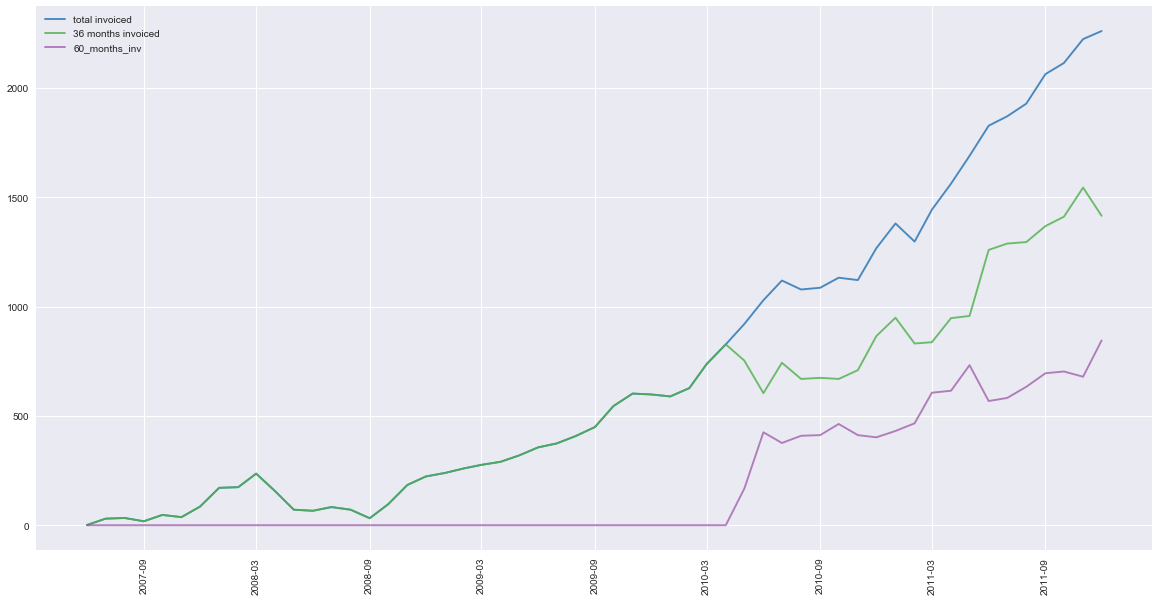

In [702]:
# Total Loans disbursed
# We can see that the loan disbursal is growing at a steady rate

palette = plt.get_cmap('Set1')

_ = plt.figure(figsize=(20,10))
ax1, = plt.plot(final_ct['date'],final_ct["total_invoiced"], marker='', color=palette(1), linewidth=1.9, alpha=0.9, label="total invoiced")
ax2, = plt.plot(final_ct['date'],final_ct["36_months_inv"], marker='', color=palette(2), linewidth=1.9, alpha=0.8, label="36 months invoiced")
ax3, = plt.plot(final_ct['date'],final_ct["60_months_inv"], marker='', color=palette(3), linewidth=1.9, alpha=0.7, label="60_months_inv")
_ = plt.xticks(rotation=90)
plt.legend(handles=[ax1,ax2,ax3])
plt.show()




# Key Comments :
    
### 1. As we can see that the business is growing. 
### 2. The 60 months loan tenure was added as a package later on by the business. 
### 3. The loan as definitely added to the business growth


In [703]:
# Drawing a correlation between the newly derived values from the new created cross tab data frame
_ = plt.figure(figsize=(20,10))
f = (
    final_ct.loc[:, ['total_invoiced', '36_months_inv', '60_months_inv', '36_months_charged_off_pct', '60_months_charged_off_pct']]
        ).corr()

sns.heatmap(f, annot=True)



# Key Comments :

### 1. Heat map shows a very high correlation between total invoiced and 60 months charged off percentage which means that the new product is causing pressure
### 2. Heat map shows a some how negative correlation between charge off and 36 months invoiced


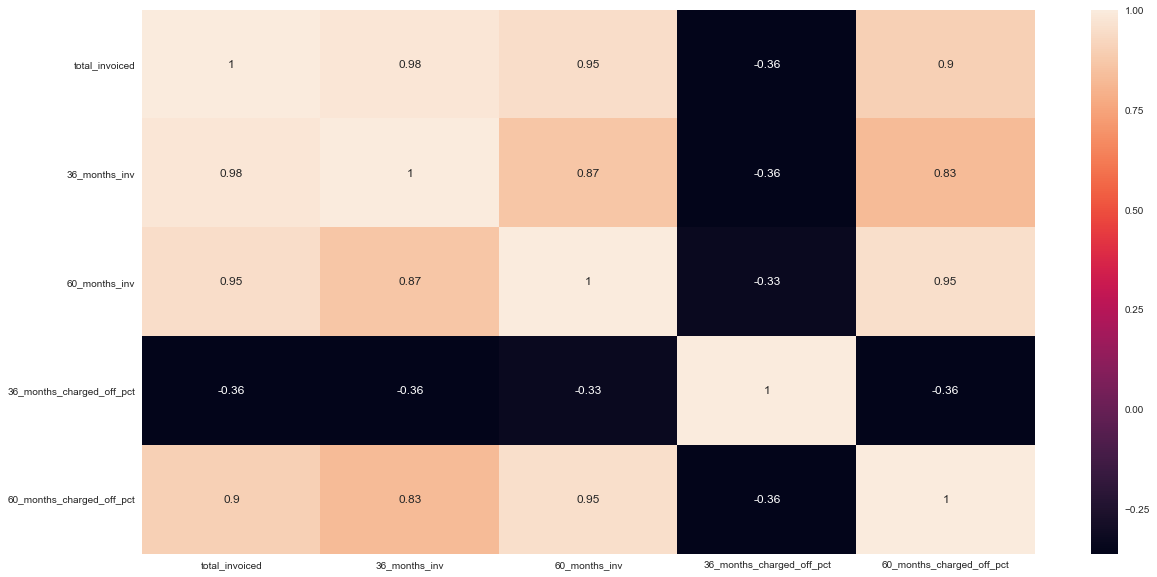

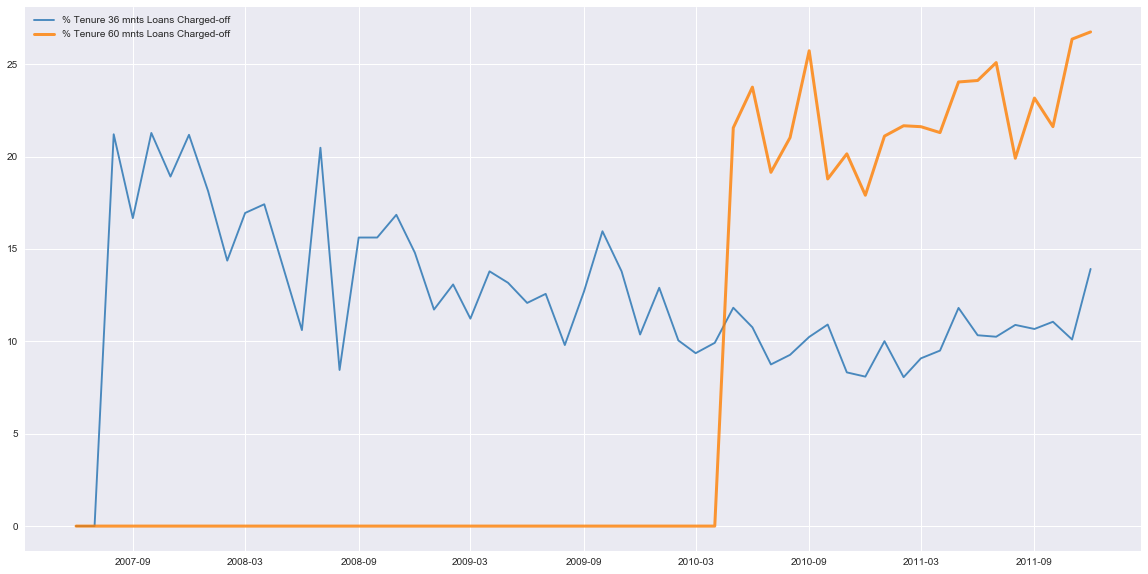

In [704]:
# We took out the percentage of loans which were bad on 60 months vs 36 months on a line chart to 
#understand the details further. As we had already seen above that the  business was growing at a steady good rate


palette = plt.get_cmap('Set1')

_ = plt.figure(figsize=(20,10))
ax1, = plt.plot(final_ct['date'],final_ct["36_months_charged_off_pct"], marker='', color=palette(1), linewidth=1.9, alpha=0.9, label="% Tenure 36 mnts Loans Charged-off")
ax2, = plt.plot(final_ct['date'],final_ct["60_months_charged_off_pct"], marker='', color=palette(4), linewidth=3, alpha=0.8, label="% Tenure 60 mnts Loans Charged-off")

plt.legend(handles=[ax1,ax2])
plt.show()



# Key Comments :

### 1. As it is quite obvious that the charge off is much higher for loans that are getting extended for 60 months vs 36 months

### 2. The new product was adding to the top line but it was causing negative effects to the overall profit



In [705]:
#
# Added some more derived columms for grades with charged off loans to understand if there is any co-relation
# charge offs and grades
#
#
#
#
# add some more derived columms for grades with charged off loans
#


# add some more derived columms for grades with charged off loans by term type
#
# add some more derived columms for grades with charged off loans
#

#
loan_fil = loan.loc[(loan["loan_status"]=="Charged Off") & (loan["term"]=="60") ]

ct11 = pd.crosstab(loan_fil['issue_d'],loan_fil['grade'])

ct12 = pd.crosstab(loan['issue_d'],loan['grade'])

print(ct11.columns)

ct13 = pd.DataFrame

for colm in ct12.columns:
    ct11[colm + "_pct_bad_60"] = round((ct11[colm]/ct12[colm])*100,2)

print(ct11)

del ct11['A']
del ct11['B']
del ct11['C']
del ct11['D']
del ct11['E']
del ct11['F']
del ct11['G']

ct11['date'] = pd.to_datetime(ct11.index)

final_ct = pd.merge(final_ct,ct11,how='outer',on='date')

final_ct = final_ct.fillna(0)

print (final_ct.columns)


Index(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='object', name='grade')
grade       A   B   C   D   E   F  G  A_pct_bad_60  B_pct_bad_60  \
issue_d                                                            
2010-05-01  2  4   5   11  13  1   0  0.93          1.44           
2010-06-01  5  25  17  24  18  10  2  2.15          8.53           
2010-07-01  0  20  14  12  20  6   0  0.00          6.06           
2010-08-01  0  19  7   24  19  13  4  0.00          5.81           
2010-09-01  2  31  23  22  22  3   3  0.84          9.45           
2010-10-01  9  22  20  12  16  5   3  2.96          7.01           
2010-11-01  4  19  20  15  15  5   5  1.13          5.65           
2010-12-01  0  14  25  12  11  9   1  0.00          4.12           
2011-01-01  0  16  26  21  20  6   2  0.00          4.07           
2011-02-01  0  18  23  17  26  10  7  0.00          4.74           
2011-03-01  0  12  24  34  34  20  7  0.00          2.91           
2011-04-01  2  21  39  26  28  12  3  0.54 

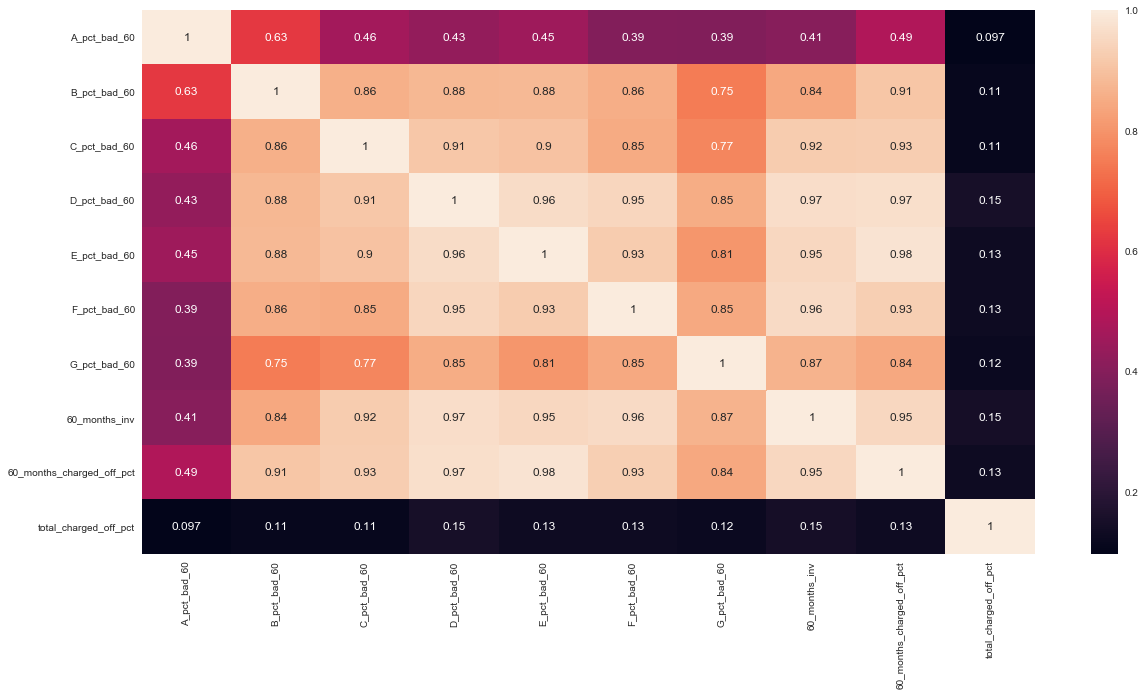

In [706]:
###############
## Creating a heat map of correlation between categories charged off loans
## Consistently the corre
###



_ = plt.figure(figsize=(20,10))
f = (
    final_ct.loc[:, ['A_pct_bad_60', 'B_pct_bad_60', 'C_pct_bad_60',
       'D_pct_bad_60', 'E_pct_bad_60', 'F_pct_bad_60', 'G_pct_bad_60','60_months_inv', '60_months_charged_off_pct',
       'total_charged_off_pct']]
        ).corr()

sns.heatmap(f, annot=True)

plt.show()


# Key Comments

## 1. Accross all the grades in 60 months category the charged off percentage for 60 months has very high correlation
## 2. So doesnt seem that any grade is causing a problem it seem that the product itself has some issues which needs to be looked at.